### Teguh Prasetyo
### Intermediate Machine Learning

## Final Project, 31 Januari 2021
# Forest Fire Prediction

### Background
* Kebakaran hutan adalah masalah lingkungan yang bertanggung jawab terhadap ekonomi dan kerusakan alam juga mengancam kehidupan manusia.
* Dataset ini digunakan untuk bisa membangun sistem pendeteksi kebakaran hutan menggunakan data-data meteorologi seperti temperature, angin, kelembaban dan sebagainya.
* Sistem ini digunakan untuk **memprediksi potensi luasan area yang terbakar oleh api (persoalan regresi)** yang mana informasi ini dibutuhkan untuk kebutuhan manajemen sumberdaya para pemadam kebakaran.


### Request
* Dengan dataset berikut, silahkan bangun AI atau system cerdas yang dapat **memprediksi potensi luasan area yang terbakar oleh api** berdasarkan data-data meteorologi.
* Lakukan minimal **4 eksperimen berbasiskan algoritma Deep Learning** dengan dataset berikut dan sertakan analisa berdasarkan hasil-hasil yang diberikan oleh eksperimen tersebut.
* Eksperimen yang dilakukan bisa berdasarkan kepada hyperparameter yang ada dalam algoritma Deep Learning seperti: **Epoch, Batch Size, Activation Function, Loss Function, Learning Rate, Optimizer** dan lainnya.
* Lakukan Performance Improvement dengan menggunakan teknik **Early Stopping & Model Check point** ataupun teknik lainnya yang dinilai mampu meningkatkan performa pembelajaran.


### Request Summary
1. Prediksi luasan area yang terbakar dengan regresi
2. Lakukan minimal 4 eksperimen berbasiskan algoritma Deep Learning
3. Eksperimen dilakukan pada hyperparameter (Epoch, Batch Size, Activation Function, Loos Function, Learning Rate, Optimizer dan lainnya.
4. Performa improvement dengan Early Stopping & Model Check Point

### Tahapan Analysis Data:
1. Data Exploration
2. Data Visualization
3. Prediksi Potensi Kebakaran dengan ANN
    * Feature Importance
    * Data Preprocessing
    * Mentraining Data dengan Neural Network
    * Experiment Variasi Epoch & Batch Size
    * Plot History Training
    * Prediksi Potensi Luasan Kebarakan
4. Kesimpulan

## 1. Data Exploration

In [1]:
# Versi Python dan Keras yang digunakan

import sys
print('Python version:', sys.version)
import keras
print('Keras version:', keras.__version__)

Python version: 3.8.10 (default, May 19 2021, 13:12:57) [MSC v.1916 64 bit (AMD64)]
Keras version: 2.4.3


In [2]:
# Library import data & exploration

import numpy as np
import pandas as pd

In [3]:
# Load Data

df_fire = pd.read_csv('forestfires.csv')
df_fire

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [4]:
# Cek tipe data

df_fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [5]:
# Mengetahui isi feature month

df_fire['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [6]:
# Mengetahui isi feature day

df_fire['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [7]:
# Mengecek missing value

print('Missing value:', df_fire.isna().sum().sum())

Missing value: 0


### Note :
1. Data forest fire terdiri dari 517 baris dan 13 kolom.
2. Tidak ada missing value.
3. Feature month dan day bertipe objek, sehingga perlu dirubah kedalam bentuk numeric agar dapat dianalisa kedalam model.

In [8]:
# Untuk feature month dan day perlu dirubah menjadi integer.
# Encode Feature month dan day

df_fire.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
df_fire.day.replace(('sun','mon','tue','wed','thu','fri','sat'),(1,2,3,4,5,6,7), inplace=True)

In [9]:
# Cek tipe data setelah di rubah

df_fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int64  
 3   day     517 non-null    int64  
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 52.6 KB


### Data Set Information:

In [Cortez and Morais, 2007], the output 'area' was first transformed with a **ln(x+1) function**.
Then, several Data Mining methods were applied. After fitting the models, the outputs were
post-processed with the **inverse of the ln(x+1) transform**. Four different input setups were
used. The experiments were conducted using a 10-fold (cross-validation) x 30 runs. Two
regression metrics were measured: MAD and RMSE. A Gaussian support vector machine (SVM) fed
with only 4 direct weather conditions (temp, RH, wind and rain) obtained the best MAD value:
12.71 +- 0.01 (mean and confidence interval within 95% using a t-student distribution). The
best RMSE was attained by the naive mean predictor. An analysis to the regression error curve
(REC) shows that the SVM model predicts more examples within a lower admitted error. In effect,
the SVM model predicts better small fires, which are the majority.

Ref : http://archive.ics.uci.edu/ml/datasets/Forest+Fires


### Attribute information:

   Untuk informasi lebih detail, dapat membaca [Cortez and Morais, 2007](http://www3.dsi.uminho.pt/pcortez/forestfires/).

   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: "jan" to "dec" 
   4. day - day of the week: "mon" to "sun"
   5. FFMC - FFMC index from the FWI (Fire Weather Index) system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3 
   7. DC - DC index from the FWI system: 7.9 to 860.6 
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
   (this output variable is very skewed towards 0.0, thus it may make
    sense to model with the logarithm transform). 

Detail istilah FFMC, DMC, DC dan ISI dapat merujuk website [National Wildfire Cordinating Group](https://www.nwcg.gov/publications/pms437/cffdrs/fire-weather-index-system)

### Note :
* Pada dataset terdapat feature **area** yang merupakan feature target.

In [10]:
# Cek statistik dari data

df_fire.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
month,517.0,7.475822,2.275990,1.0,7.0,8.00,9.00,12.00
day,517.0,3.972921,2.143867,1.0,2.0,4.00,6.00,7.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00


## 2. Data Visualization

In [11]:
# Library data visualisasi

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [12]:
# Melihat insiden kebakaran berdasarkan bulan

bulan = pd.read_csv('forestfires.csv')

# Ambil data kasus kebakaran yang >0 saja
df_bulan = bulan.copy()
df_bulan.drop(df_bulan.loc[df_bulan['area']<=0.1].index, inplace=True)

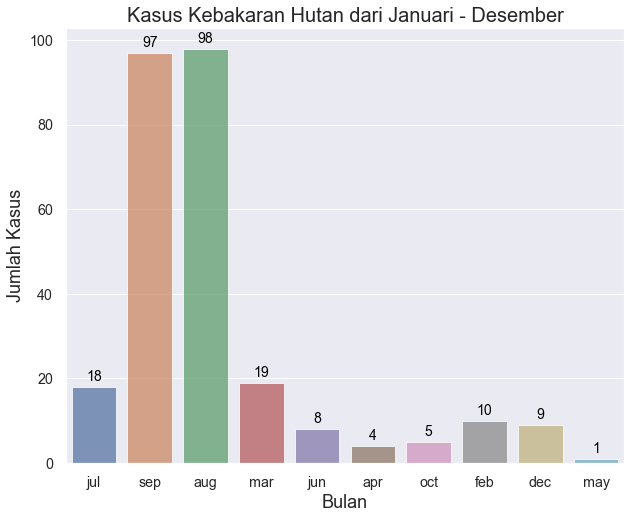

<Figure size 576x396 with 0 Axes>

In [14]:
# Memvisualisasikan kasus kebakaran terbanyak beradasarkan bulan
plt.figure(figsize=(10,8))
sns.set(font_scale=1.3)
grafik = sns.countplot(x='month', alpha=0.75, data=df_bulan)
plt.title('Kasus Kebakaran Hutan dari Januari - Desember', size=20)
plt.xlabel('Bulan', size=18)
plt.ylabel('Jumlah Kasus', size=18)
for p in grafik.patches:
    grafik.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', color='black',
                   size=14,
                   xytext = (0, 10), 
                   textcoords = 'offset points')

plt.show()

plt.tight_layout()

fig = grafik.get_figure()
fig.savefig('Kasus Kebakaran Hutan dari Januari-Desember.png', dpi=300)

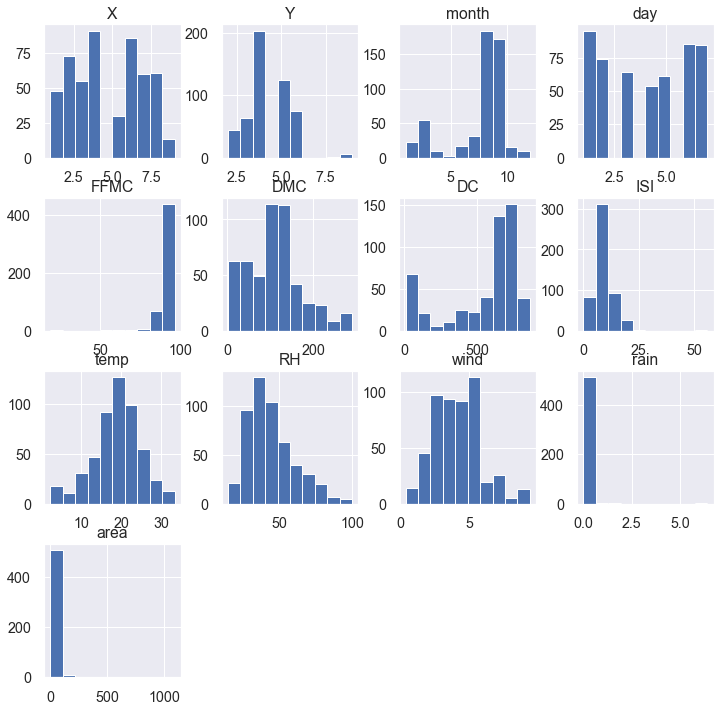

In [15]:
# Plot histogram untuk melihat distribusi data pada semua variable

df_fire.hist(figsize=(12, 12))

plt.show()

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

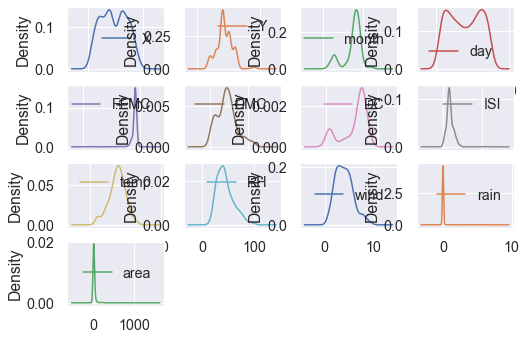

In [16]:
# Melihat density plot

df_fire.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False)

### Note :
Dari grafik histogram dan density, terlihat bahwa beberapa feature datanya tidak berdistribusi normal, terutama pada feature target yaitu kolom area yang perlu di normalisasi dengan transformasi logaritma

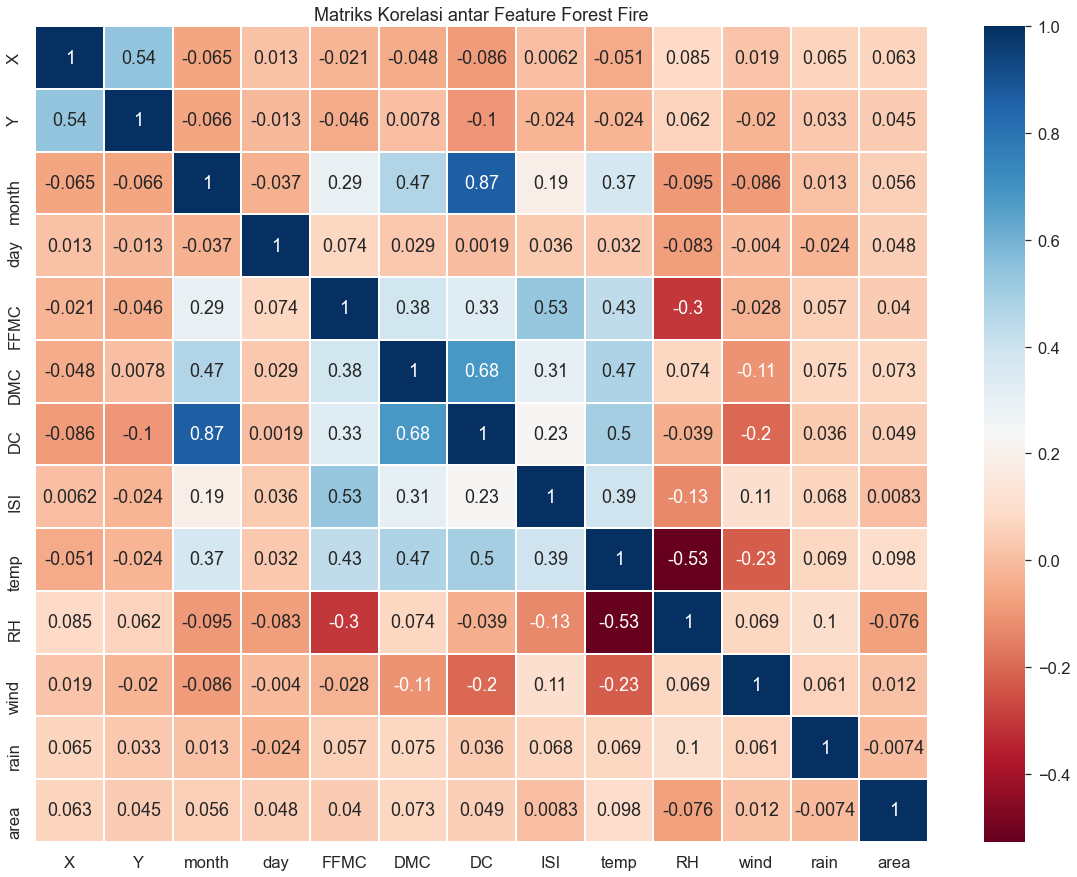

In [17]:
# Melihat hubungan (korelasi) antar feature dengan heatmap

# Heatmap untuk semua feature

# Set ukuran heatmap
plt.figure(figsize=(20,15))

# Generate Heate Map
sns.set(font_scale=1.5)
heat = sns.heatmap(data=df_fire.astype(float).corr(), linewidths=0.1,
        square=False, linecolor='white', cmap='RdBu', annot=True)
plt.title('Matriks Korelasi antar Feature Forest Fire', size=18)

plt.show()

# Menyimpan Grafik
fig = heat.get_figure()
fig.savefig('Heatmap Forest Fire.png', dpi=150)

### Note :
Dari grafik heatmap terlihat bahwa feature yang memiliki hubungan (korelasi) >0.3 atau <-0.3 dengan feature yang lain adalah month, FFMC, DMC,DC, ISI, Temp dan RH, sedangkan feature X, Y, day, wind dan rain, korelasinya terhadap feature lainnya kecil sekali.  

## 3. Prediksi Potensi Luas Area Terbakar dengan ANN

### 3.1. Data Preprocessing
### *3.1.1 Prepare Data*

In [18]:
# Melihat kembali 5 dataset teratas

df_fire.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

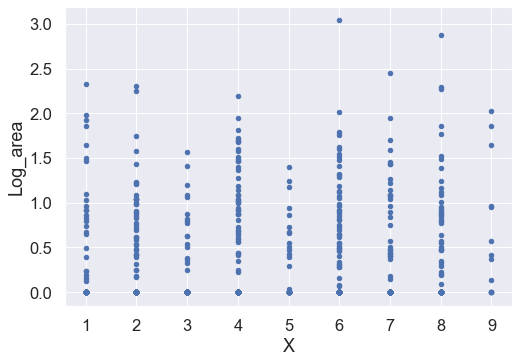

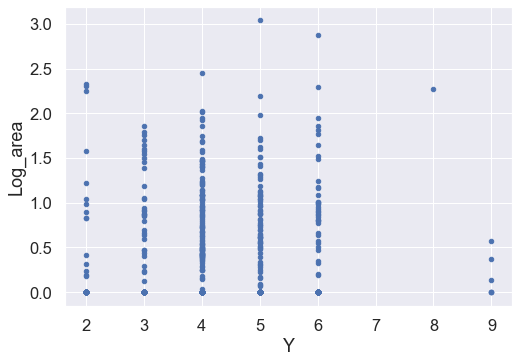

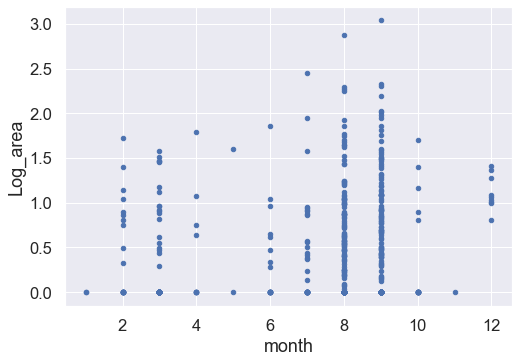

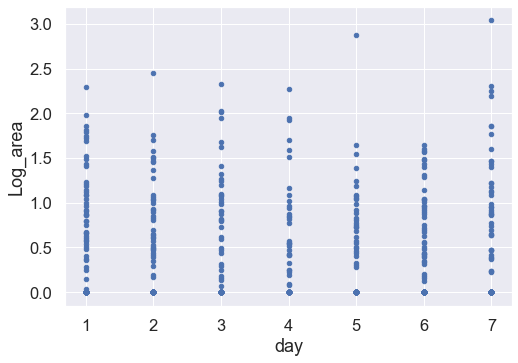

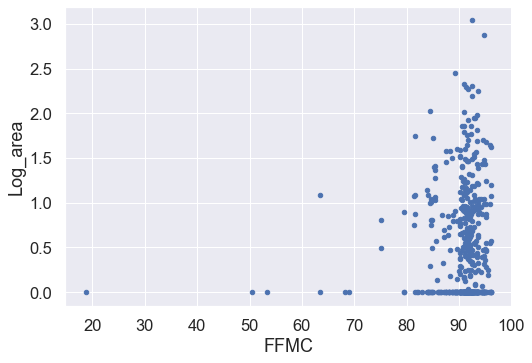

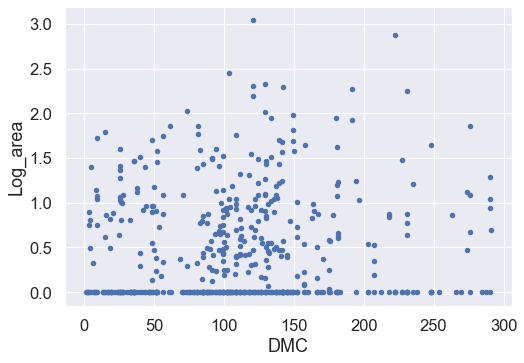

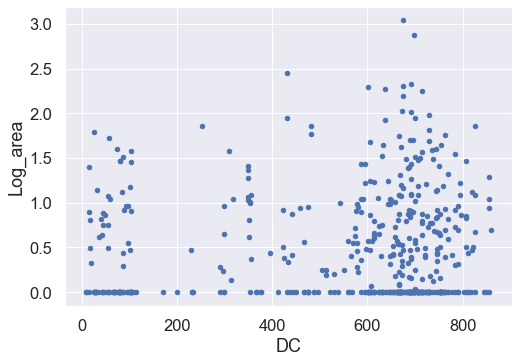

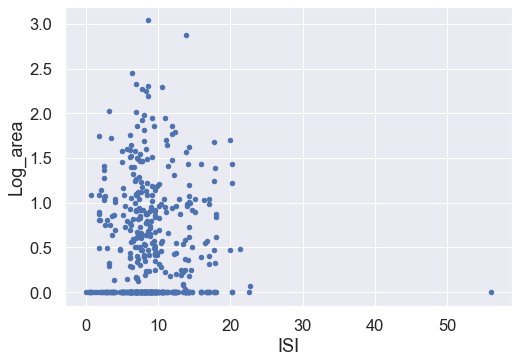

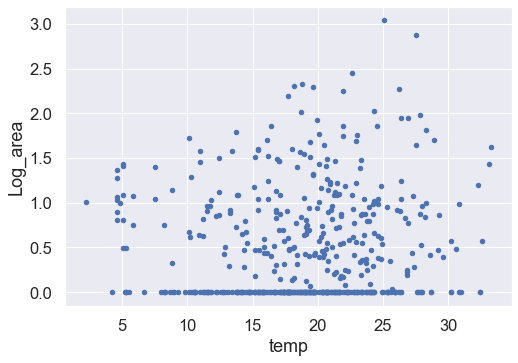

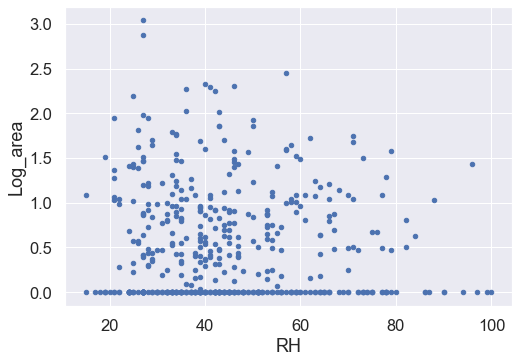

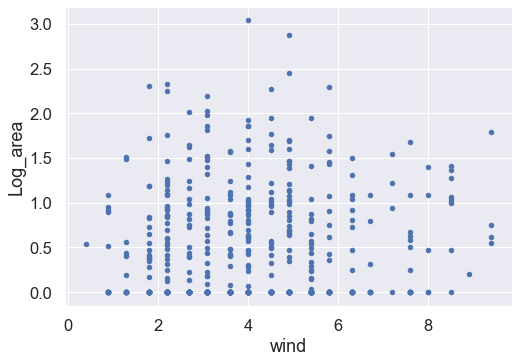

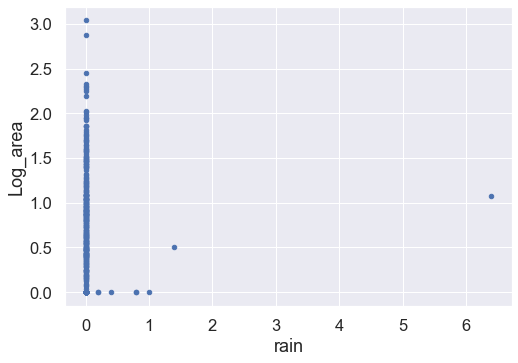

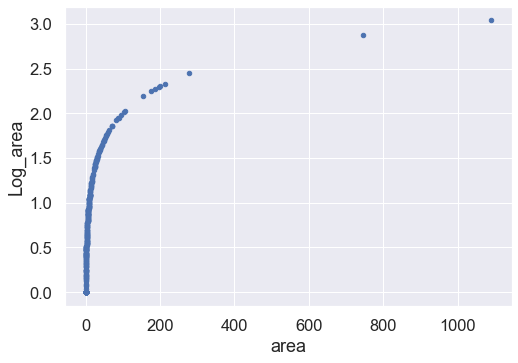

In [19]:
# Melakukan transformasi feature target (area) dengan transformasi logaritma, 
# kemudian hasil transformasi dibuat dalam feature baru bernama Log-area dan
# dibuat korelasinya terhadap feature lain dengan scatter plot.

# Import Library

import numpy as np

# Tranformasi logaritma ln(x+1) dan menambahkan kolom baru
df_fire['Log_area']=np.log10(df_fire['area']+1)

# Mengkorelasikan Log-area dengan feature lain dengan scatter plot
for i in df_fire.describe().columns[:-1]:
    df_fire.plot.scatter(i,'Log_area',grid=True)

### Note :
Dari scatter plot feature area vs Log-area terlihat hubungannya logaritmic dan terdapat 2 data outlier yang ekstrim.

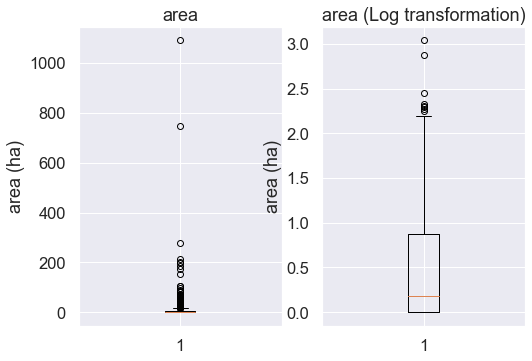

In [20]:
# Melihat apakah ada data yang outlier pada feature area

# Boxplot
plt.subplot(1, 2, 1)
plt.boxplot(df_fire['area'])
plt.ylabel('area (ha)')
plt.title('area')

plt.subplot(1, 2, 2)
plt.boxplot(df_fire['Log_area'])
plt.ylabel('area (ha)')
plt.title('area (Log transformation)')

plt.show()

### Note :
Dari boxplot di atas, diketahui:
1. Data outlier pada feature area ada 2 data yaitu nilai >400 ha (>2.5 [Log_area]) yang perlu dieliminir agar model lebih baik.
2. Terlihat setelah data pada feature area di transformasi, datanya lebih terdistribusi normal dibanding sebelumnya.

In [21]:
# Mengecek outlier data dengan cara Quantile-based Flooring and Capping

print(df_fire['Log_area'].quantile(0.10))
print(df_fire['Log_area'].quantile(0.90))


0.0
1.4192141567941385


In [22]:
# Remove outlier tidak dapat berdasarkan Quantile-based Flooring-
# karena akan banyak data yang terbuang, maka tetap yang di buang >2.5

df_fireout = df_fire.copy()
df_fireout.drop(df_fireout.loc[df_fireout['Log_area']>=2.5].index, inplace=True)

In [23]:
# Melihat kembali statistik data Log-area setelah di transformasi

df_fireout.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X,515.0,4.660194,2.312853,1.0,3.00,4.000000,7.000000,9.000000
Y,515.0,4.295146,1.229610,2.0,4.00,4.000000,5.000000,9.000000
month,515.0,7.471845,2.279302,1.0,7.00,8.000000,9.000000,12.000000
day,515.0,3.965049,2.143387,1.0,2.00,4.000000,6.000000,7.000000
FFMC,515.0,90.633010,5.527184,18.7,90.20,91.600000,92.900000,96.200000
DMC,515.0,110.635922,63.980106,1.1,65.45,108.300000,141.850000,291.300000
DC,515.0,547.401942,248.396286,7.9,435.50,661.800000,713.900000,860.600000
ISI,515.0,9.013010,4.563223,0.0,6.45,8.400000,10.750000,56.100000
temp,515.0,18.860388,5.798962,2.2,15.50,19.300000,22.800000,33.300000
RH,515.0,44.355340,16.313441,15.0,33.00,42.000000,53.000000,100.000000


In [24]:
# Dimensi data
df_fireout.shape

(515, 14)

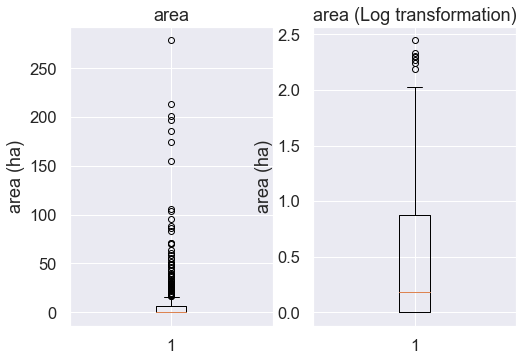

In [25]:
# Cek Outlier data setelah di remove

# Boxplot
plt.subplot(1, 2, 1)
plt.boxplot(df_fireout['area'])
plt.ylabel('area (ha)')
plt.title('area')

plt.subplot(1, 2, 2)
plt.boxplot(df_fireout['Log_area'])
plt.ylabel('area (ha)')
plt.title('area (Log transformation)')

plt.show()

In [26]:
# Nama kolom

df_fireout.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area', 'Log_area'],
      dtype='object')

### *3.1.2 Feature Selection*
Dari data visualisasi di atas yaitu dengan heatmap terdapat feature-feature penting yang berhubungan dengan feature lainnya, yaitu :
* month
* FFMC
* DMC
* DC
* ISI
* temp
* RH

### *3.1.2 Prepare Train dan Test Data*

### Data 1, Menggunakan Semua Feature

In [27]:
# Menyimpan data dependent variabel

y1 = df_fireout['Log_area']
y1

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
512    0.871573
513    1.742647
514    1.084934
515    0.000000
516    0.000000
Name: Log_area, Length: 515, dtype: float64

In [28]:
# Menyimpan data independent variabel

X1 = df_fireout.drop(['area','Log_area'], axis=1)
X1

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,1,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,2,4,8,1,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,7,4,8,1,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,1,4,8,7,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


### Data 2, Menggunakan Feature Cuaca Utama

Variabel X hanya terdiri dari feature berikut:
* temp
* RH
* wind
* rain

In [29]:
# Menyimpan data independent variabel

X2 = df_fireout.iloc[:,8:12]
X2

,temp,RH,wind,rain
0,8.2,51,6.7,0.0
1,18.0,33,0.9,0.0
2,14.6,33,1.3,0.0
3,8.3,97,4.0,0.2
4,11.4,99,1.8,0.0
...,...,...,...,...
512,27.8,32,2.7,0.0
513,21.9,71,5.8,0.0
514,21.2,70,6.7,0.0
515,25.6,42,4.0,0.0


### *3.2.2 Split Data*
Membuat dataset X dan y untuk training

In [30]:
# Library split data
from sklearn.model_selection import train_test_split

# Library machine learning dan deep learning
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras import regularizers

In [31]:
# Split Data 1
# Create X and Y datasets for training 

# Import Library
import sklearn
from sklearn.model_selection import train_test_split

trainX1, testX1, trainy1, testy1 = train_test_split(X1, y1, 
                                    test_size=0.2, random_state=2)

In [32]:
print('Shape of trainX1:', trainX1.shape)
print('Shape of testX1:', testX1.shape)
print('Shape of trainy1:', trainy1.shape)
print('Shape of testy1:', testy1.shape)

Shape of trainX1: (412, 12)
Shape of testX1: (103, 12)
Shape of trainy1: (412,)
Shape of testy1: (103,)


In [33]:
# Split Data 2
# Create X and Y datasets for training 

# Import Library
import sklearn
from sklearn.model_selection import train_test_split

trainX2, testX2, trainy1, testy1 = train_test_split(X2, y1, test_size=0.2, random_state=2)

In [34]:
print('Shape of trainX2:', trainX2.shape)
print('Shape of testX2:', testX2.shape)
print('Shape of trainy1:', trainy1.shape)
print('Shape of testy1:', testy1.shape)

Shape of trainX2: (412, 4)
Shape of testX2: (103, 4)
Shape of trainy1: (412,)
Shape of testy1: (103,)


### 3.3a. Mentraining Data dengan Neural Network
### *Data 1 : X1 dan y1 dari semua feature*

### Experiment 1
Menggunakan semua feature dan data feature adalah X1 dan label adalah y1,
100 epochs dan 1 batch size

In [35]:
# Define model

model = Sequential()
model.add(Dense(64, input_dim=12, activation='relu',
kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu',
kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu',
kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
model.summary() #Print model Summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                832       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6

In [36]:
# Compile model

opti = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=opti)


In [37]:
# Train model dengan epochs = 100, batch size = train size
history = model.fit(trainX1, trainy1, validation_data=(testX1, testy1),
epochs=100, batch_size=1, verbose=1)

Epoch 1/100
412/412 [==============================] - 0s 747us/step - loss: 11850.2656 - val_loss: 102.4931
Epoch 2/100
412/412 [==============================] - 0s 470us/step - loss: 2055.2959 - val_loss: 10.5398
Epoch 3/100
412/412 [==============================] - 0s 465us/step - loss: 920.0856 - val_loss: 40.3084
Epoch 4/100
412/412 [==============================] - 0s 465us/step - loss: 509.1531 - val_loss: 4.2306
Epoch 5/100
412/412 [==============================] - 0s 471us/step - loss: 365.5989 - val_loss: 0.9204
Epoch 6/100
412/412 [==============================] - 0s 480us/step - loss: 246.5266 - val_loss: 1.4441
Epoch 7/100
412/412 [==============================] - 0s 476us/step - loss: 152.8347 - val_loss: 0.7161
Epoch 8/100
412/412 [==============================] - 0s 473us/step - loss: 78.3662 - val_loss: 0.4835
Epoch 9/100
412/412 [==============================] - 0s 472us/step - loss: 87.7236 - val_loss: 1.0167
Epoch 10/100
412/412 [============================

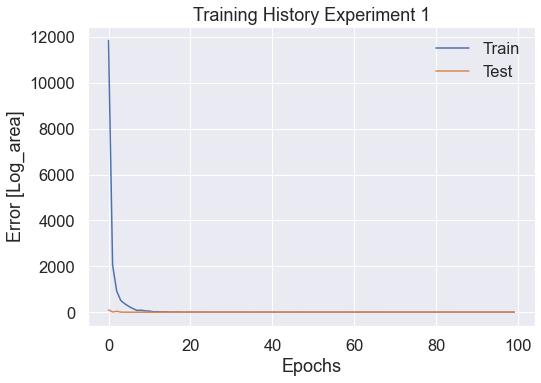

In [38]:
# plot training history
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.xlabel('Epochs')
plt.ylabel('Error [Log_area]')
plt.title('Training History Experiment 1')
plt.legend()
plt.show()

#### Prediction

In [39]:
train_pred = model.predict(trainX1).flatten()
test_pred = model.predict(testX1).flatten()

In [40]:
from sklearn.metrics import mean_squared_error

mean_squared_error(trainy1, train_pred)

0.34384685275645527

In [41]:
mean_squared_error(testy1, test_pred)

0.35326238026209317

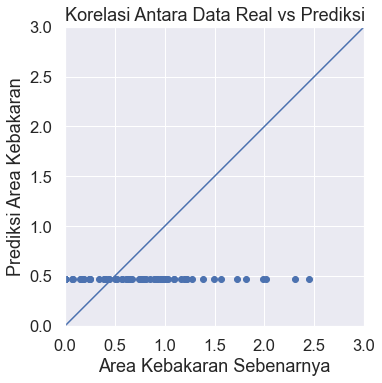

In [42]:
test_predictions = model.predict(testX1).flatten()

a = plt.axes(aspect='equal')
plt.scatter(testy1, test_predictions)
plt.xlabel('Area Kebakaran Sebenarnya')
plt.ylabel('Prediksi Area Kebakaran')
plt.title('Korelasi Antara Data Real vs Prediksi')
lims = [0, 3]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

### Experiment 2
Menggunakan semua feature.
Menggunakan 2 hidden layer, 200 epoch dan 8 batch size.

In [51]:
# Define model

model = Sequential()
model.add(Dense(64, input_dim=12, activation='relu',
kernel_initializer='normal'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu',
kernel_initializer='normal'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary() #Print model Summary

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                832       
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
_________________________________________________________________


In [52]:
# Compile model

opti = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=opti)

In [53]:
# Train model dengan epochs = 100, batch size = train size
history = model.fit(trainX1, trainy1, validation_data=(testX1, testy1),
epochs=200, batch_size=8, verbose=1)

Epoch 1/200
52/52 [==============================] - 0s 2ms/step - loss: 0.5364 - val_loss: 0.5871
Epoch 2/200
52/52 [==============================] - 0s 652us/step - loss: 0.5505 - val_loss: 0.5717
Epoch 3/200
52/52 [==============================] - 0s 697us/step - loss: 0.5612 - val_loss: 0.5725
Epoch 4/200
52/52 [==============================] - 0s 683us/step - loss: 0.5181 - val_loss: 0.5903
Epoch 5/200
52/52 [==============================] - 0s 693us/step - loss: 0.5586 - val_loss: 0.5890
Epoch 6/200
52/52 [==============================] - 0s 702us/step - loss: 0.5560 - val_loss: 0.5797
Epoch 7/200
52/52 [==============================] - 0s 670us/step - loss: 0.5497 - val_loss: 0.5740
Epoch 8/200
52/52 [==============================] - 0s 710us/step - loss: 0.5412 - val_loss: 0.5726
Epoch 9/200
52/52 [==============================] - 0s 692us/step - loss: 0.5423 - val_loss: 0.5724
Epoch 10/200
52/52 [==============================] - 0s 698us/step - loss: 0.5356 - val_loss

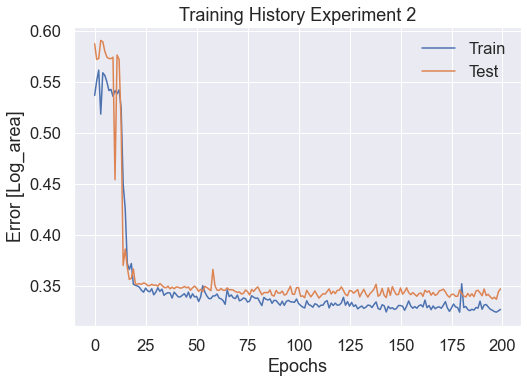

In [54]:
# plot training history
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.xlabel('Epochs')
plt.ylabel('Error [Log_area]')
plt.title('Training History Experiment 2')
plt.legend()
plt.show()

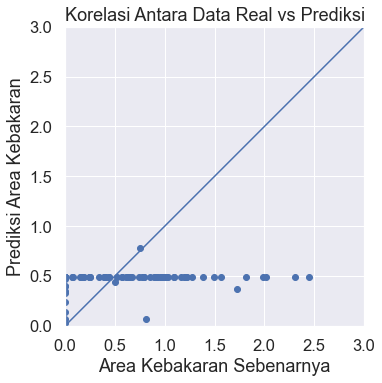

In [55]:
# Prediction

test_predictions = model.predict(testX1).flatten()

a = plt.axes(aspect='equal')
plt.scatter(testy1, test_predictions)
plt.xlabel('Area Kebakaran Sebenarnya')
plt.ylabel('Prediksi Area Kebakaran')
plt.title('Korelasi Antara Data Real vs Prediksi')
lims = [0, 3]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

### Experiment 3
Menggnuakan semua feature.
Menggunakan 2 hidden layer dan Early Stopping, 500 epoch dan 8 batch size.

In [56]:
# Define model

model = Sequential()
model.add(Dense(64, input_dim=12, activation='relu',
kernel_initializer='normal'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu',
kernel_initializer='normal'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary() #Print model Summary

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                832       
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
_________________________________________________________________


In [57]:
# Compile model

opti = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=opti)

In [58]:
from keras.callbacks import EarlyStopping

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

# Train model dengan epochs = 100, batch size = train size
history = model.fit(trainX1, trainy1, validation_data=(testX1, testy1),
epochs=500, batch_size=8, verbose=1, callbacks=[es])

Epoch 1/500
52/52 [==============================] - 0s 2ms/step - loss: 0.5933 - val_loss: 0.5606
Epoch 2/500
52/52 [==============================] - 0s 623us/step - loss: 0.5695 - val_loss: 0.5655
Epoch 3/500
52/52 [==============================] - 0s 678us/step - loss: 0.5683 - val_loss: 0.5637
Epoch 4/500
52/52 [==============================] - 0s 663us/step - loss: 0.5350 - val_loss: 0.4208
Epoch 5/500
52/52 [==============================] - 0s 690us/step - loss: 0.5784 - val_loss: 0.5864
Epoch 6/500
52/52 [==============================] - 0s 671us/step - loss: 0.5566 - val_loss: 0.5915
Epoch 7/500
52/52 [==============================] - 0s 690us/step - loss: 0.5668 - val_loss: 0.5907
Epoch 8/500
52/52 [==============================] - 0s 689us/step - loss: 0.5551 - val_loss: 0.5846
Epoch 9/500
52/52 [==============================] - 0s 702us/step - loss: 0.5524 - val_loss: 0.4657
Epoch 10/500
52/52 [==============================] - 0s 683us/step - loss: 0.5219 - val_loss

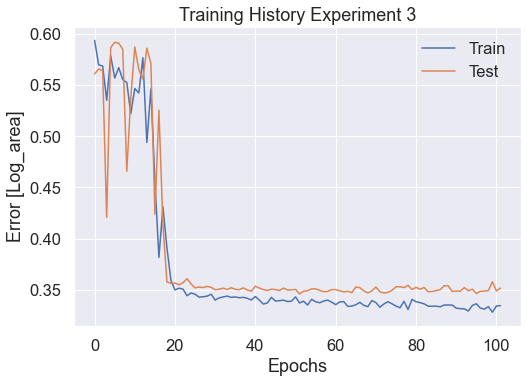

In [59]:
# plot training history
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.xlabel('Epochs')
plt.ylabel('Error [Log_area]')
plt.title('Training History Experiment 3')
plt.legend()
plt.show()

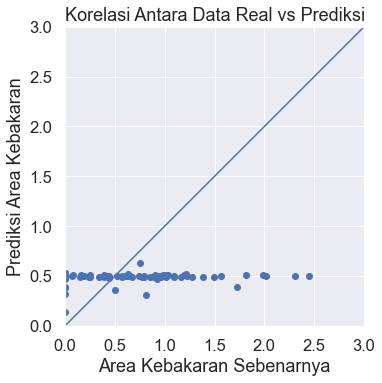

In [60]:
test_predictions = model.predict(testX1).flatten()

a = plt.axes(aspect='equal')
plt.scatter(testy1, test_predictions)
plt.xlabel('Area Kebakaran Sebenarnya')
plt.ylabel('Prediksi Area Kebakaran')
plt.title('Korelasi Antara Data Real vs Prediksi')
lims = [0, 3]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

### Experiment 4
Menggnuakan 4 feature (temp, RH, wind & rain).
Menggunakan 2 hidden layer dan Early Stopping, 500 epoch dan 256 batch size.

In [61]:
# Define model

model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu',
kernel_initializer='normal'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu',
kernel_initializer='normal'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary() #Print model Summary

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                320       
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


In [62]:
# Compile model

opti = Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opti)

In [63]:
from keras.callbacks import EarlyStopping

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

# Train model dengan epochs = 100, batch size = train size
history = model.fit(trainX2, trainy1, validation_data=(testX2, testy1),
epochs=500, batch_size=256, verbose=1, callbacks=[es])

Epoch 1/500
2/2 [==============================] - 0s 42ms/step - loss: 0.4278 - val_loss: 0.3587
Epoch 2/500
2/2 [==============================] - 0s 3ms/step - loss: 0.3621 - val_loss: 0.3605
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 0.3545 - val_loss: 0.3525
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 0.3523 - val_loss: 0.3529
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 0.3427 - val_loss: 0.3537
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 0.3395 - val_loss: 0.3531
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 0.3368 - val_loss: 0.3535
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 0.3476 - val_loss: 0.3546
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 0.3489 - val_loss: 0.3554
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 0.3359 - val_loss: 0.3536
Epoch 11/500
2/2 [==========

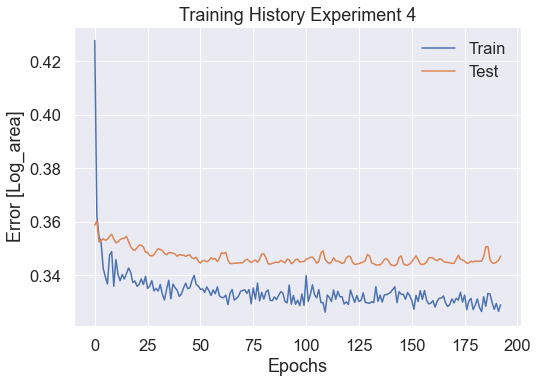

In [65]:
# plot training history
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.xlabel('Epochs')
plt.ylabel('Error [Log_area]')
plt.title('Training History Experiment 4')
plt.legend()
plt.show()

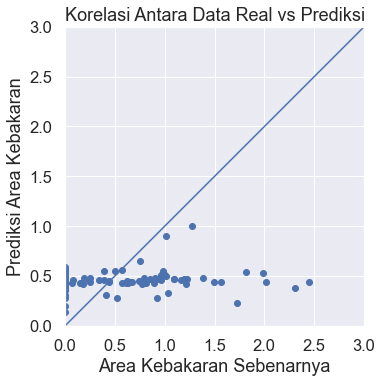

In [66]:
test_predictions = model.predict(testX2).flatten()

a = plt.axes(aspect='equal')
plt.scatter(testy1, test_predictions)
plt.xlabel('Area Kebakaran Sebenarnya')
plt.ylabel('Prediksi Area Kebakaran')
plt.title('Korelasi Antara Data Real vs Prediksi')
lims = [0, 3]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## Kesimpulan

### Model terbaik adalah dari experiment 3 dan 4